Installing Python and accessing earth engine

In [ ]:
import ee


In [ ]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=5SN-Grqc6Gr3nh5Z8cr2PI91nG9jSf37Bf9wZrVC-qg&tc=6nqUgw39xHRpsfvSaBAiJIpJCx_Yxx6BEavIhlRl3vE&cc=ITJA-lOyW6rg71Z0sGDCqytv-n5h8RyZdlaQms-LhCk

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1Adeu5BVET1r2RmDUN3FnHel7G778ZjnTVdNABXNVX8na8Z6hgsRvnRPrTK8

Successfully saved authorization token.


## **Importing Dataset**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [27]:
# Dataset is now stored in a Pandas Dataframe
df = pd.read_csv('loanData.csv')
df.head()

print(df.shape)
print(df)

(500, 15)
     Unnamed: 0   Loan_ID  Gender Married Dependents     Education  \
0             0  LP001002    Male      No          0      Graduate   
1             1  LP001003    Male     Yes          1      Graduate   
2             2  LP001005    Male     Yes          0      Graduate   
3             3  LP001006    Male     Yes          0  Not Graduate   
4             4  LP001008    Male      No          0      Graduate   
..          ...       ...     ...     ...        ...           ...   
495         495  LP002586  Female     Yes          1      Graduate   
496         496  LP002587    Male     Yes          0  Not Graduate   
497         497  LP002588    Male     Yes          0      Graduate   
498         498  LP002600    Male     Yes          1      Graduate   
499         499  LP002602    Male      No          0      Graduate   

    Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0              No             5849                0.0         NaN   
1          

In [37]:
df.drop(['Unnamed: 0', 'Loan_ID'], axis = 1, inplace = True)

# **Data Analysis**



In [21]:
#understanding size and information of data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [22]:
df.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,500.000000,482.000000,486.000000,459.000000
mean,249.500000,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,144.481833,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000
25%,124.750000,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,249.500000,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,374.250000,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,499.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000


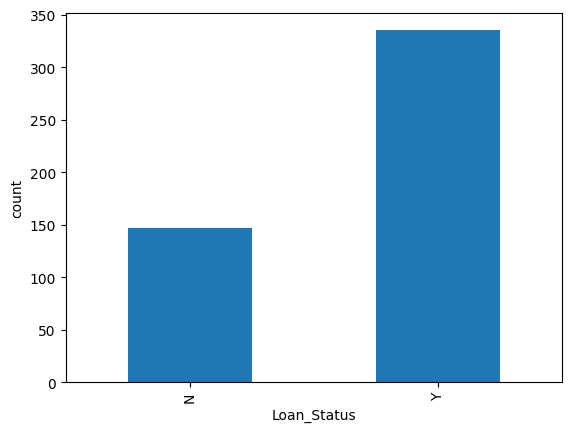

Y: 0.69%
N: 0.31%


In [50]:
#target value
target = 'Loan_Status'

df.groupby(target)['LoanAmount'].count().plot.bar()
plt.ylabel('count')
plt.show()

print('Y: {}%'.format(df[target].value_counts()[0] / len(df)))
print('N: {}%'.format(df[target].value_counts()[1] / len(df)))

In [51]:
#missing values
df.isnull().sum()

null_features = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

for feature in null_features:
    print('{}: {}% values missing'.format(feature, (df[feature].isnull().sum() / len(df)) * 100))

Gender: 1.7999999999999998% values missing
Married: 0.6% values missing
Dependents: 2.4% values missing
Self_Employed: 5.4% values missing
LoanAmount: 3.5999999999999996% values missing
Loan_Amount_Term: 2.8000000000000003% values missing
Credit_History: 8.200000000000001% values missing


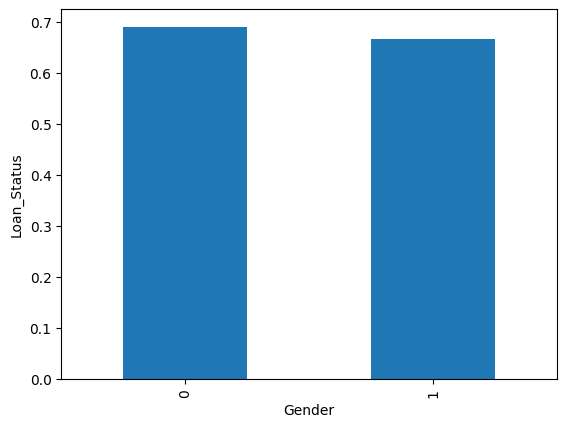

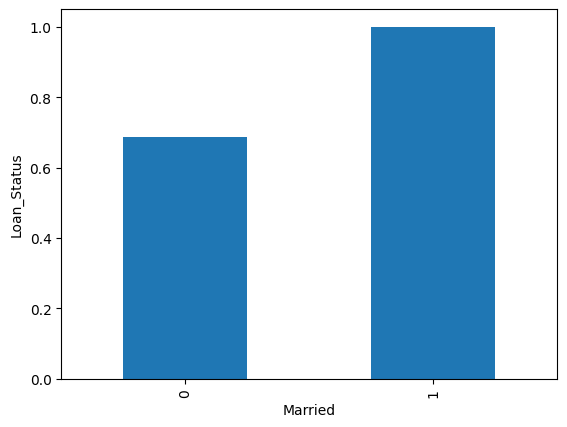

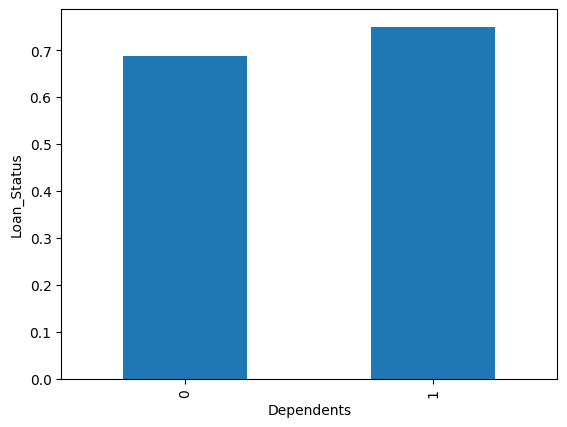

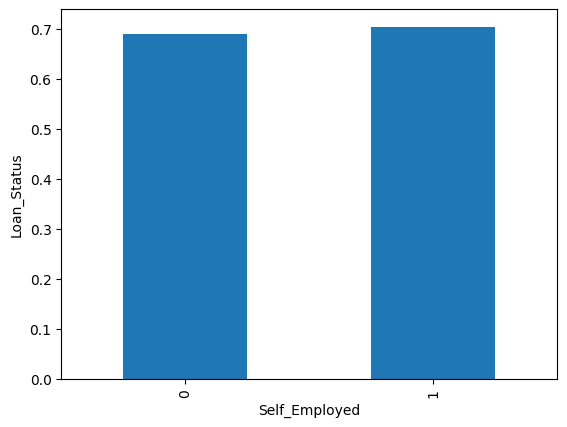

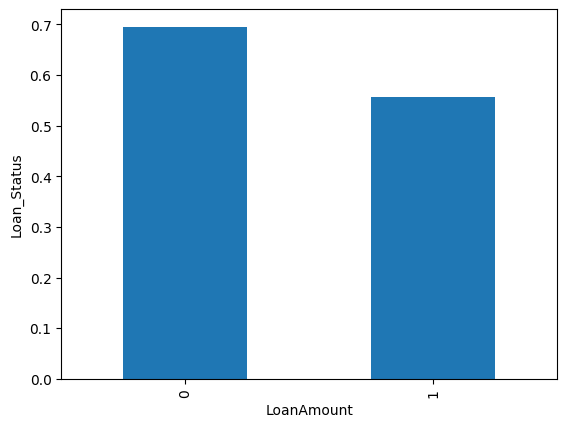

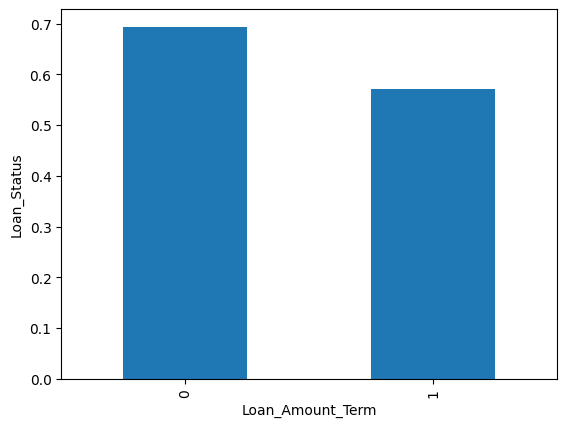

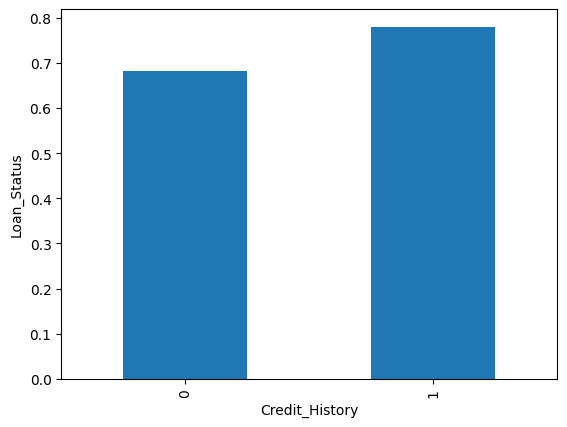

In [53]:
#understanding realtionship between null values and target variable
for feature in null_features:
    data = df.copy()

    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data[target] = np.where(data[target] == 'Y', 1, 0)
    data.groupby(feature)[target].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

Observations: no significant relationship can be observed between loan status and missing values. The number of missing values is not
very large to impact the analysis significantly.

In [54]:
nan_numeric = []
nan_categoric = []

for feature in null_features:
    if df[feature].dtype != 'O':
        nan_numeric.append(feature)
    else:
        nan_categoric.append(feature)

print('Numeric missing:', nan_numeric)
print('Categorical missing:', nan_categoric)

Numeric missing: ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical missing: ['Gender', 'Married', 'Dependents', 'Self_Employed']


In [56]:
data = df.copy()
for feature in nan_categoric:
    data[feature] = np.where(data[feature].isnull(), data[feature].mode(), data[feature])

for feature in nan_numeric:
    data[feature] = np.where(data[feature].isnull(), int(data[feature].median()), data[feature])

data[target] = np.where(data[target] == 'Y', 1, 0)

Numeric Feature Analysis

In [57]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [58]:
num_features = [feature for feature in data.columns if data[feature].dtype != 'O' and feature != target]

data[num_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
0,5849,0.0,126.0,360.0,1.0,5849.0
1,4583,1508.0,128.0,360.0,1.0,6091.0
2,3000,0.0,66.0,360.0,1.0,3000.0
3,2583,2358.0,120.0,360.0,1.0,4941.0
4,6000,0.0,141.0,360.0,1.0,6000.0


In [59]:
#understanding discrete variables
dis_features = [feature for feature in num_features if len(data[feature].unique()) < 20]

dis_features

['Loan_Amount_Term', 'Credit_History']

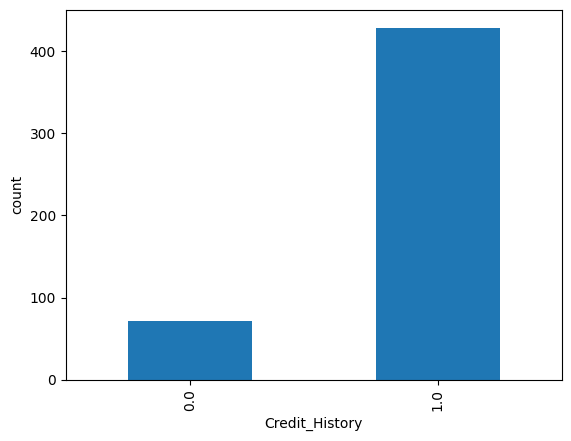

In [63]:
#understanding distribution
for feature in dis_features:
  data.groupby(feature)[target].count().plot.bar()

  plt.xlabel(feature)
  plt.ylabel('count')
  plt.show

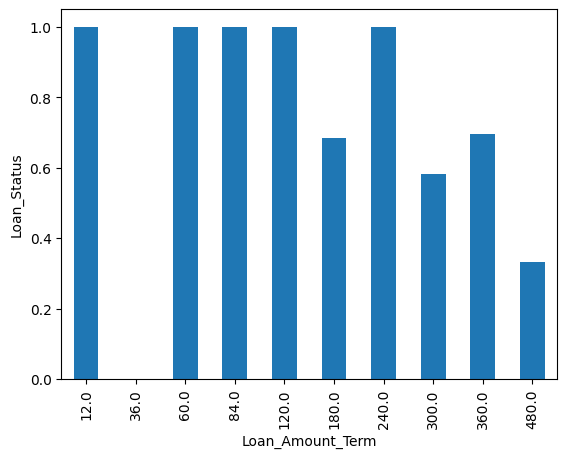

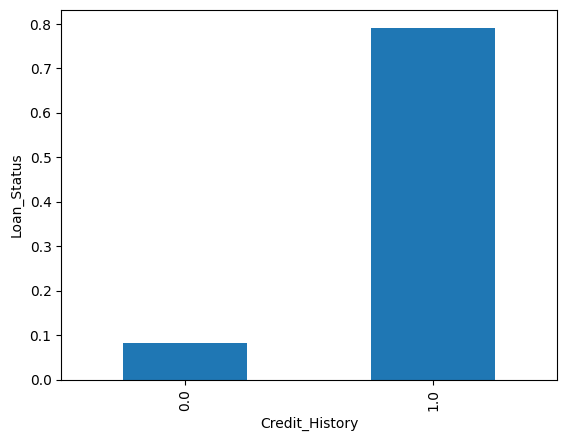

In [65]:
for feature in dis_features:
  data.groupby(feature)[target].mean().plot.bar()

  plt.xlabel(feature)
  plt.ylabel(target)
  plt.show()

Observation: Credit Histroy variable affects the loan status

In [66]:
#understanding continuous features
con_features =  [feature for feature in num_features if feature not in dis_features]

con_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']

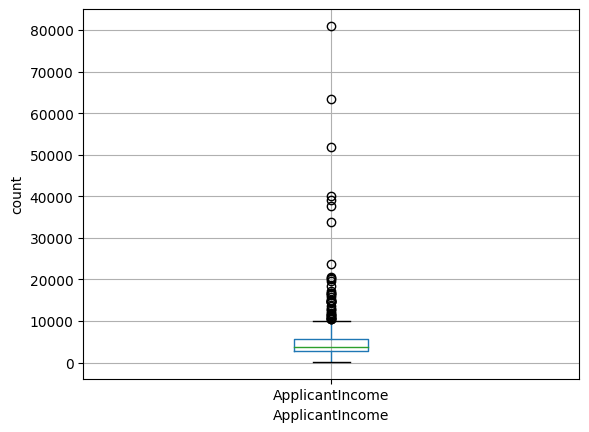

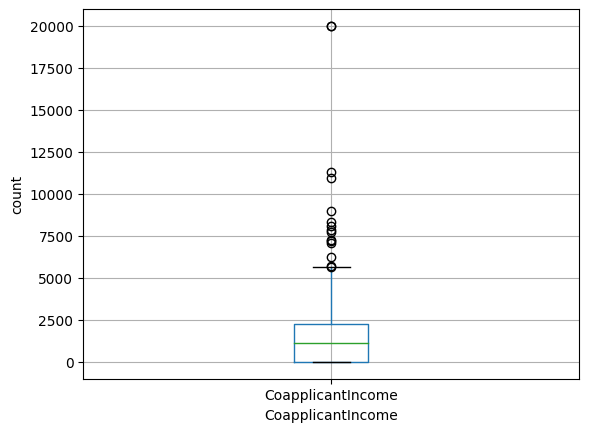

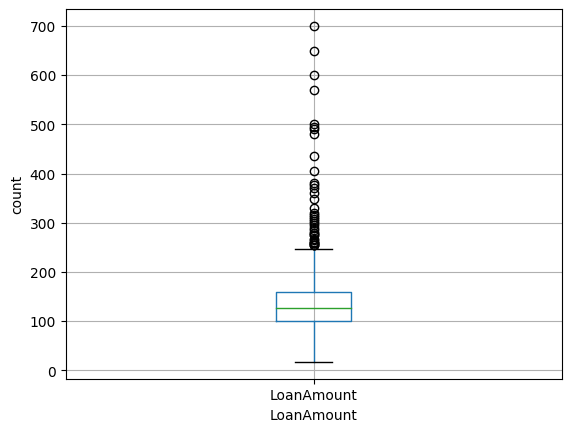

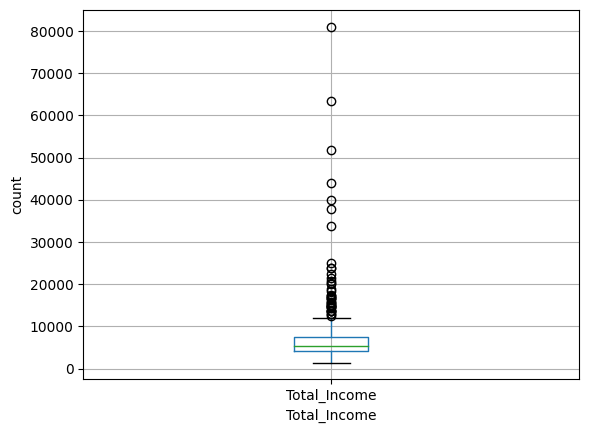

In [67]:
for feature in con_features:
    data.boxplot(column = feature)

    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

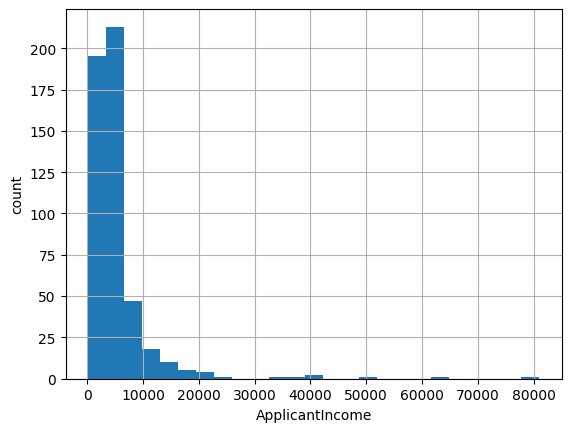

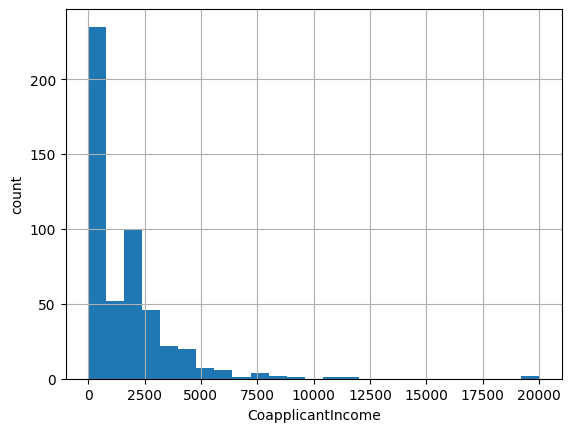

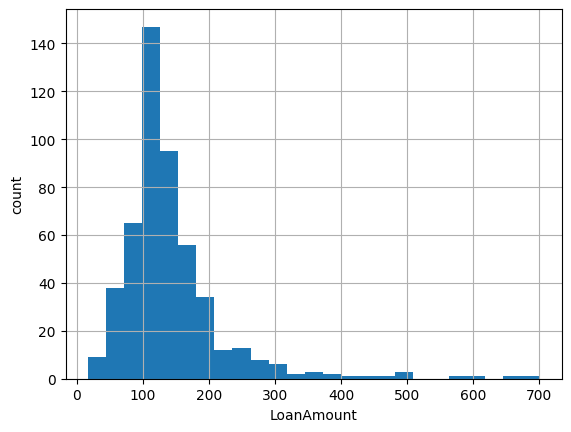

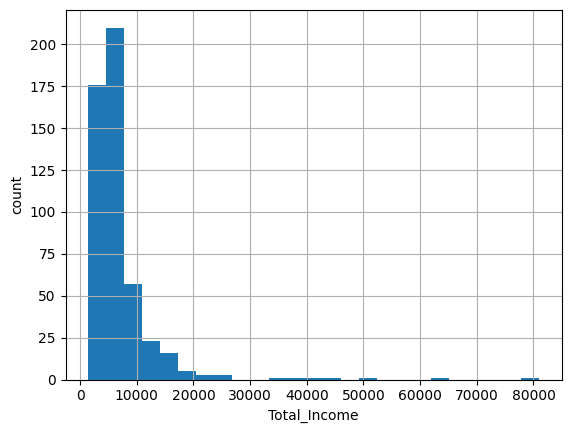

In [71]:
for feature in con_features:
  data[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.show()

In [76]:
#Data Transformation and understanding Outliers
for feature in con_features:
  extreme = data[feature].median() + 3 * data[feature].std()

  print(feature)
  print('Values to be replaced: {}%'.format((len(data.loc[data[feature] > extreme]) / len(data)) * 100))

ApplicantIncome
Values to be replaced: 0.0%
CoapplicantIncome
Values to be replaced: 0.0%
LoanAmount
Values to be replaced: 0.0%
Total_Income
Values to be replaced: 0.0%


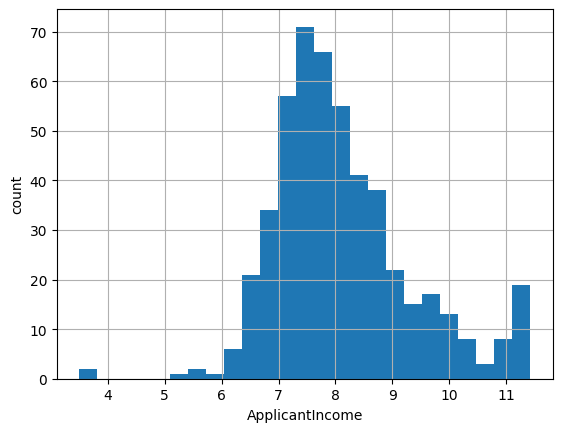

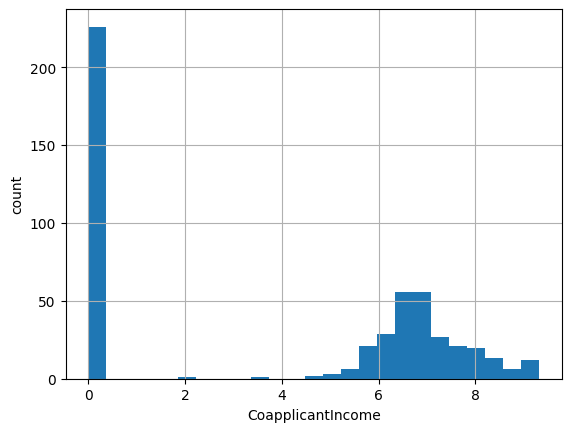

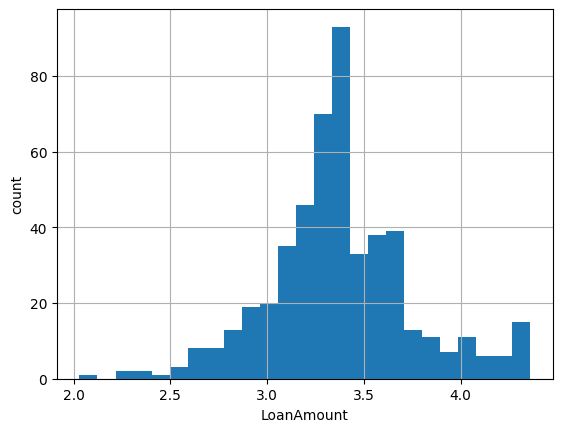

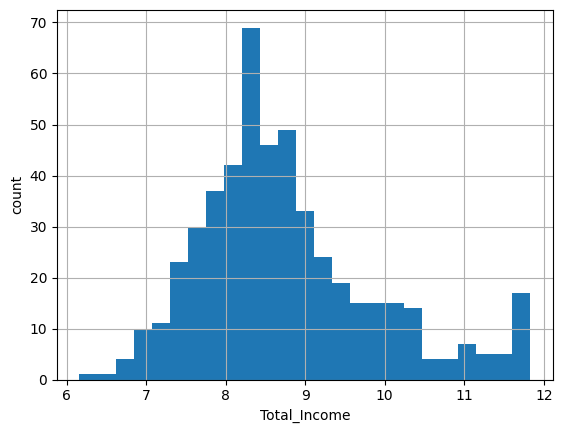

In [75]:
for feature in con_features:
    extreme = data[feature].median() + 3 * data[feature].std()

    data[feature] = np.where(data[feature] > extreme, extreme, data[feature])
    data[feature] = data[feature] ** 0.5
    data[feature].hist(bins = 25)

    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

Categorical Feature Analysis

In [77]:
cat_features = [feature for feature in data.columns if feature not in num_features and feature != target]

data[cat_features].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [78]:
#understanding unique values
for feature in cat_features:
    print('{}: {} categories'.format(feature, len(data[feature].unique())))

Gender: 2 categories
Married: 2 categories
Dependents: 4 categories
Education: 2 categories
Self_Employed: 2 categories
Property_Area: 3 categories


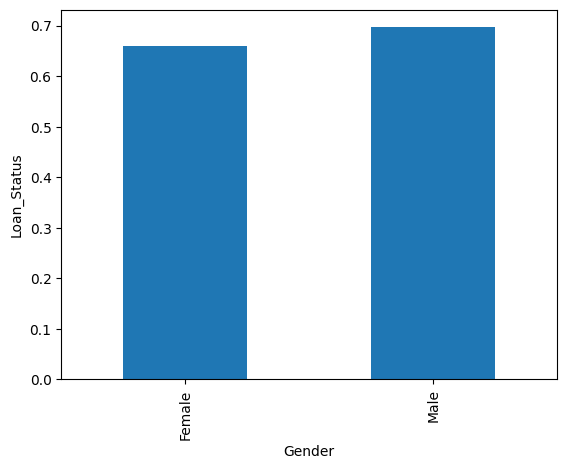

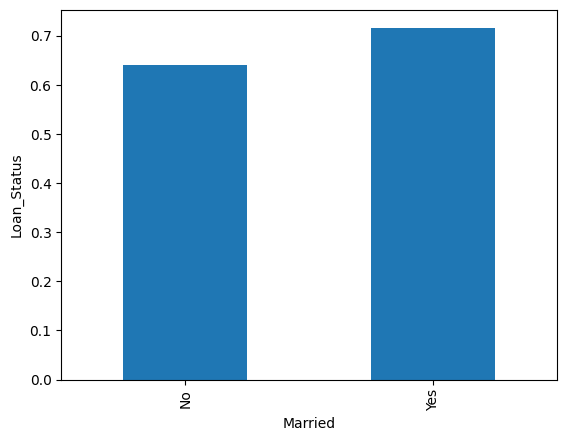

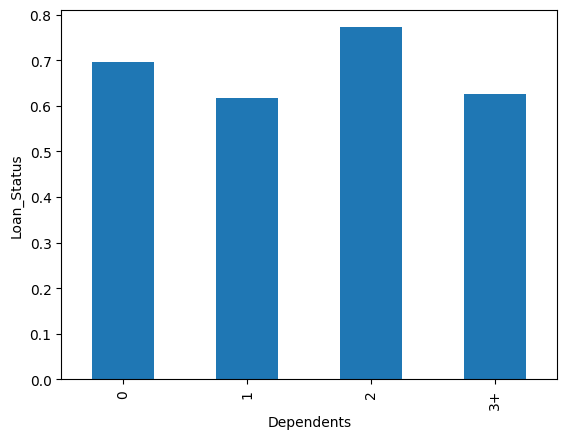

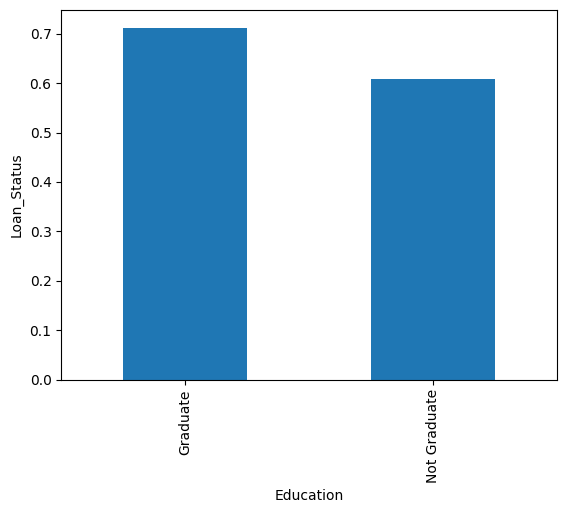

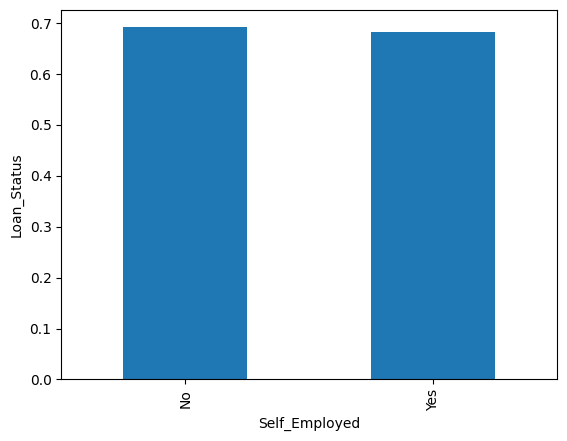

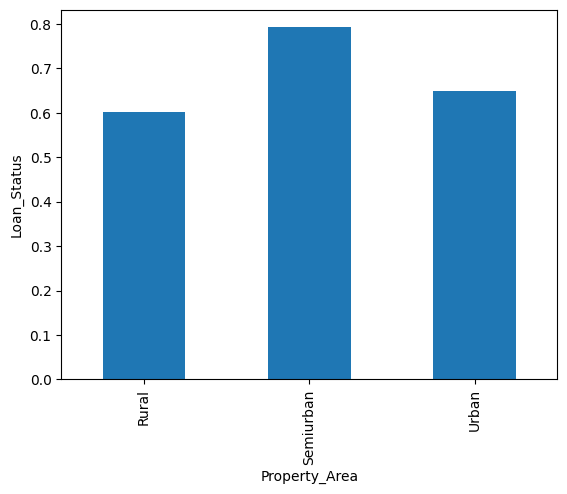

In [79]:
for feature in cat_features:
    data.groupby(feature)[target].mean().plot.bar()

    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

No significant relationships can be decided


# **Data Preprocessing**

# **Model Development**

# **Model Evaluation**

